#  Да ли богатији троше више ресурса?
У претходној лекцији смо прегледали податке који су достпуни у оквиру скупа __[**National Footprint and Biocapacity Accounts 2021 Public Data Package**](https://www.footprintnetwork.org/licenses/public-data-package-free/)__. На подацима смо направили одређене измене које смо сачували у новој табели *NFA 2021 v2*. Ову табелу ћемо користити у наредним анализама. 

In [1]:
import pandas as pd

otisak = pd.read_csv('podaci/NFA 2021 v2.csv')

Већ је речено да се помоћу варијабле *Number of Earths required* може исказати у којој мери нека држава троши своје, али и глобалне биокапацитете. Сада ћемо трошење природних ресурса однос приказати директније, као однос укупних биокапацитета сваке државе и њеног укупног еколошког отиска. Државе, које су на графикону означене тачкацима, обојићемо различитим бојама у зависности од њиховог богатства, односно категорије просечних прихода њихових становника.  

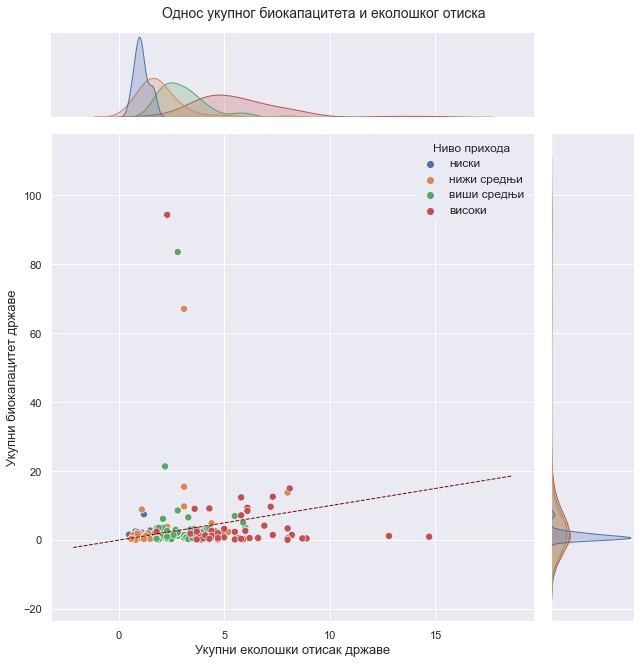

In [2]:
import matplotlib.pyplot as plt
import seaborn as sbrn

logTra = False # Подесите на True ако желите да се вредности на осама трансформишу
graBio = 100   # Подесите на мању вредност ако желите да сманјите распон варијабле Total biocapacity

sbrn.set_theme(style='darkgrid')
graf = sbrn.jointplot(data=otisak[otisak['Total biocapacity'] < graBio].sort_values(by='Income Group R'), hue='Income Group',
    x='Total Ecological Footprint', y='Total biocapacity', height=9, s=50)
graf.fig.suptitle("Однос укупног биокапацитета и еколошког отиска", y=1.02, fontsize = 14)
graf.ax_joint.set_xlabel('Укупни еколошки отисак државе', fontsize=13)
graf.ax_joint.set_ylabel('Укупни биокапацитет државе', fontsize=13)

# Логаритамска трансформација вредности на осама
if logTra:
    graf.ax_joint.set_xscale('log')
    graf.ax_joint.set_yscale('log')

# Уређивање изгледа легенде
leg=graf.ax_joint.legend_
leg.set_title('Ниво прихода', prop = {'size':12})
nazKat = ['ниски', 'нижи средњи', 'виши средњи', 'високи']
leg.get_frame().set_linewidth(0)
plt.setp(leg.get_texts(), fontsize='12')
for rb, lab in enumerate(leg.get_texts()):
    leg.get_texts()[rb].set_text(nazKat[rb])

# Цртање дијагоналне линије, тј. функције y = x

x0, x1 = graf.ax_joint.get_xlim()
y0, y1 = graf.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
graf.ax_joint.plot(lims, lims, color='maroon', linestyle='--', linewidth=1)

plt.show()

Разлика између укупног еколошког отиска државе и њених биокапацитета означава се као *еколошки дефицит* уколико је прва вредност мања од друге или *еколошка резерва* уколико је обратно. Црвеном линијом на горњем графикону исцртанаје функција `y = x`, тачније граница одрживости. То је теоријски низ вредности који приказује однос у коме би свака држава трошила онолико ресурса колико их има на располагању. Видимо да је нешто више држава испод те линије што показује да имају еколошки дефицит. На основу боје тачкица може се закључити да су то углавном државе са високим просечним приходима становника. На ободима дијаграма распршења приказане су и дистрибуције вредности обе варијабле што вам омогућава да процените њихове просеке и степен варијаблности за сваку категорију држава.
<BR><BR>
Еколошки дефицит или резерва су већ израчунати за сваку државу и забележени у колони *Ecological Deficit or Reserve*. Приказаћемо основне описне показатеље ове варијабле за четири групе држава формиране на основу категорија просечних прихода по становнику.

In [3]:
tabela = otisak.groupby('Income Group R')['Ecological Deficit or Reserve'].describe().reset_index()
tabela.rename(columns={'Income Group R': 'Приходи', 'count': 'Број држава'}, inplace=True)
tabela['Приходи'].replace({1: 'ниски', 2: 'нижи средњи', 3: 'виши средњи', 4: 'високи'}, inplace=True)
tabela

,Приходи,Број држава,mean,std,min,25%,50%,75%,max
0,ниски,35.0,0.160000,1.247869,-0.8,-0.400,-0.20,0.100,6.3
1,нижи средњи,47.0,1.617021,9.680355,-2.9,-1.050,-0.60,0.500,64.0
2,виши средњи,46.0,1.419565,12.470189,-3.1,-1.775,-1.15,0.075,80.9
3,високи,56.0,-1.241071,13.341811,-13.8,-5.325,-3.25,-1.675,92.1


Из табеле се види да богатије државе имају негативну просечну вредности варијабле, тј. еколошки дефицит. Највећу еколошку резерву у просеку имају државе са приходима који су окарактерисани као нижи средњи. Међутим, приликом поређења група у статистици треба имати на уму две јако битне ствари. Прва је да два броја која се разликују у апсолутном смислу уопше не морају да буду и *статистички значајно* различити. То значи да разлике међу аритметичким срединама, нпр. друге две категорије држава, могу да буду небитне или потпуно случајне. Тестирање значајности разлика између две аритметичке средине обично се обавља методом која се зове *t тест*. Израчунаћемо вредност t теста за два пара категорија држава (НС-ВС и НС-ВИ) уз помоћ пакета `scipy`. Ви можете самостално да промените параметре у коду испод и израчунате вредсноти t теста за друге парове аритметичких средина. 

In [4]:
from scipy.stats import ttest_ind

ttestNSVS = ttest_ind(otisak[otisak['Income Group R'] == 2]['Ecological Deficit or Reserve'], otisak[otisak['Income Group R'] == 3]['Ecological Deficit or Reserve'])
ttestNSVI = ttest_ind(otisak[otisak['Income Group R'] == 2]['Ecological Deficit or Reserve'], otisak[otisak['Income Group R'] == 4]['Ecological Deficit or Reserve'])
print ('Нижи  средњи - виши средњи: t = ', ttestNSVS[0].round(2), ', p = ', ttestNSVS[1].round(2))
print ('Нижи  средњи - високи: t = ', ttestNSVI[0].round(2), ', p = ', ttestNSVI[1].round(2))

Нижи  средњи - виши средњи: t =  0.09 , p =  0.93
Нижи  средњи - високи: t =  1.22 , p =  0.22


Функција `ttest_ind` враћа две вредности којима смо приступили преко индекса (0 и 1) и заокружили на две децимале. Прва је вредност t теста, а друга је тзв. *p вредност*. Вредност p nam na određeni način pokazuje kolika je verovatnoća da se razlika među aritmetičkim sredinama koju smo dobili desila potpuno slučajno. У оба примера та вероватноћа је релативно велика, pogotovo za prvi par varijabli. То значи да разлике не можемо да сматрамо статитички значајним. Консензус у статистици је да се разлике, односно статистички тестови сматрају значајним ако су п вредности мање од 0.05 или, још боље, 0.01.
<BR><BR>
Овде долазимо до друге веома битне ствари везане за тестирање разлика, а то је варијабилност појаве унутар група. На основу вредности у горњој табели видимо да је стандрадна девијација у категорији најбогатијих држава веома висока, тј. да је варијабилност међу државама веома велика. Распон вредности се креће од -13.8 до чак 92.1. Због тога ни аритемтичке средине група не можемо сматрати нарочито поузданим, па тако ни вредност t теста. Стога се у статистици често користе и "грубље" метода за тестирање разлика међу групама у којима се не рачунају просеци већ се пореде рангови ентитета на некој варијабли. Један такав тест је *Мен-Витнијев U тест*. Израчунаћемо и његове вредности за исте парове категорија држава.

In [5]:
from scipy.stats import mannwhitneyu

MWNSVS = mannwhitneyu(otisak[otisak['Income Group R'] == 2]['Ecological Deficit or Reserve'], otisak[otisak['Income Group R'] == 3]['Ecological Deficit or Reserve'])
MWNSVI = mannwhitneyu(otisak[otisak['Income Group R'] == 2]['Ecological Deficit or Reserve'], otisak[otisak['Income Group R'] == 4]['Ecological Deficit or Reserve'])
print ('Нижи  средњи - виши средњи: U = ', MWNSVS[0].round(2), ', p = ', MWNSVS[1].round(2))
print ('Нижи  средњи - високи: U = ', MWNSVI[0].round(2), ', p = ', MWNSVI[1].round(2))

Нижи  средњи - виши средњи: U =  1450.0 , p =  0.0
Нижи  средњи - високи: U =  2130.5 , p =  0.0


Овога пута резултати су потпуно другачији. Мен-Витнијев тест показује да су разлике међу свим категоријама држава заиста статистички значајне и да најбогатије државе заиста троше значајно више природних ресурса, више од осталих држава и више од онога што имају на располагању. Обратите пажњу да p вредности заправо нису нула и никада не могу да буду, већ су само изузетно мале. 

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Велика варијабилност појава отежава нам и интерпретацију резутата приказаних на горњем графикону. Подесите вредност варијабле <b>logTra</b> у горњем коду на <b>True</b> да бисте трансформисали вредности на осама рачунањем њихових логаритама.</div> 

<div class="alert alert-block alert-success">
Логаритамска трансформација вредности на осама координатног система је метода која се често користи како би се унапредила читљивост графикона. У основи, ради се умањиванју вредности али тако да се оне коју се веома велике умање више од оних мањих. Стога се оваква врсте трансформације назива *нелинеарном*. На пример, природни логаритам броја 10 је 1, броја 100 је 2, а броја 1.000 је 3. Очигледно је да се вредности на осама након трансформације не могу интерпретирати на исти начин, али то нам није толико битно. Битно је да су односи међу објектима приказаним на графикону остали у суштини непромењени и да можемо лакше да их поредимо. При томе нисмо уклонили ниједан резултат како што бисмо то учинили када бисмо смањили вредност варијабле <b>graBio</b> у горњем коду.
</div>

На крају, погледајмо и које то државе имају веома високе вредности еколошког дефицита или еколошких резерви. Овога пута ћемо приказати резултата на 3Д дијаграму распршења користећи пакете бибилиотеке `plotly`. Поред варијабле `Ecological Deficit or Reserve` приказаћемо и вредности __[indeksa humanog razvoja](https://sr.wikipedia.org/wiki/%D0%98%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D1%85%D1%83%D0%BC%D0%B0%D0%BD%D0%BE%D0%B3_%D1%80%D0%B0%D0%B7%D0%B2%D0%BE%D1%98%D0%B0)__ (HDI) којим се мере мере сиромаштво, писменост, образовање и животни век нације, као и индекс остварења __[циљева одрживог развоја](https://www.rs.undp.org/content/serbia/sr/home/sustainable-development-goals.html)__ (SDGi).

In [6]:
import plotly.express as px

graf = px.scatter_3d(otisak[otisak['Ecological Deficit or Reserve'] < 20], 
    x='HDI', y='SDGi', z='Ecological Deficit or Reserve', 
    color='Region', width=800, height=600, hover_data=['Country'])
graf.update_traces(marker=dict(size=6, line=dict(width=1, color='white')), selector=dict(mode='markers'))
graf.update_layout(margin=dict(l=0, r=0, t=0, b=0), legend=dict(title='Регион', y=0.99, x=0.01, bgcolor='rgba(0,0,0,0)'),
    scene=dict(xaxis_title='Индекс хуманог развоја', yaxis_title='Индекс одрживог развоја', zaxis_title='Еколошки дефицит или резерва'))

# Овде уметнине код за промену назива региона у легенди

graf.show()

Ротирајте графикон и анализирајте повезаности међу варијаблама, као и позиције држава. Уочите да је индекс одрживог развоја у већој корелацији са индексом хуманог развоја него са еколошким резервама. Ово је и логично јер се одрживи разовој не тиче само остварења циљева везаних за екологију, већ и за поболјшанје здравлја, сманјенје сиромаштва, унапређење образованја итд. Ови показатељи су много ближи онима на основу којих се рачуна индекс хуманог развоја. Уочите и то да земље Арапског полуострва имају највећи еколошки дефицит јер су има биокапацитети ниски, а богатство (нафтом) подиже потрошачке капацитете њихових грађана.  

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Покушајте сами да пронађете начин да промените називе региона у легенди графикона. Као полазна основа може да вам послужи <a href='https://stackoverflow.com/questions/64371174/plotly-how-to-change-variable-label-names-for-the-legend-in-a-plotly-express-li' target='_blank'>овај чланак</a>. Ако се не снађете, искористите код из датотеке <a href='podaci/legenda.txt' target='_blank'>legenda.txt</a>.</div> 

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Процените степен и смер (+ или -) међусобне корелације варијабли приказаних на графикону. Искористите код из неке од претходних лекцика да бисте направили корелациону матрицу и проверили тачност своје процене.</div> 